In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import datasets, layers, models

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [7]:
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
ann = models.Sequential([
    layers.Flatten(input_shape = (28,28)),
    layers.Dense(784, activation='relu'),
    layers.BatchNormalization(momentum = 0.99),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(momentum = 0.99),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(momentum = 0.99),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(momentum = 0.99),
    layers.Dense(64, activation='relu'),  
    layers.BatchNormalization(momentum = 0.99),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(momentum = 0.99),
    layers.Dense(10, activation='softmax'),
])

In [11]:
my_adam = tf.keras.optimizers.Adam(learning_rate=0.2)

In [12]:
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = ann.fit(x_train, y_train, epochs=10)

Epoch 1/10


1603/1875 [========================>.....] - ETA: 7s - loss: 0.3090 - accuracy: 0.9107

KeyboardInterrupt: 

In [28]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 784)               615440    
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 256)              

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report : \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 5ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [31]:
loss, accuracy = ann.evaluate(x_test, y_test)

313/313 [==============================] - 3s 5ms/step - loss: 0.0655 - accuracy: 0.9824


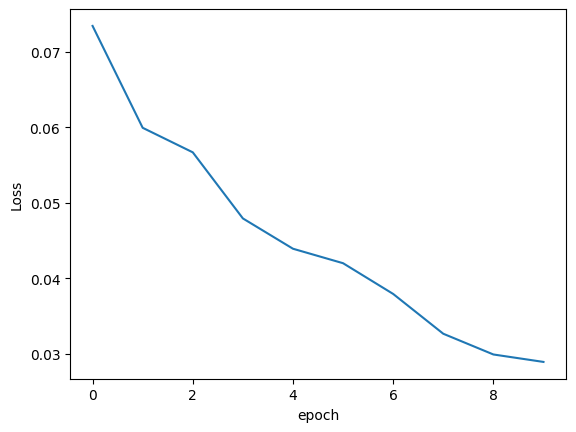

In [32]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

In [19]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')    
])

In [20]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
cnn_model = cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 40s 20ms/step - loss: 0.1643 - accuracy: 0.9484
Epoch 2/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0568 - accuracy: 0.9820
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0393 - accuracy: 0.9872
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0300 - accuracy: 0.9903
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0263 - accuracy: 0.9913
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0216 - accuracy: 0.9933
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0184 - accuracy: 0.9942
Epoch 8/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0158 - accuracy: 0.9950
Epoch 9/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0144 - accuracy: 0.9952
Epoch 10/10
1875/1875 [==============================] - 40s 22m

In [23]:
y_hat = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_hat]
print("Classification Report : \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 7ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [24]:
loss, accuracy = cnn.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0324 - accuracy: 0.9917


# Review

In this Practical i use the CNN and ANN to classification task of 10 label 
<br>
Here i use the mnist dataset that contains 60000 training images and 10000 testing images of 28X28 grayscale
<br>
Here there are 10 classes so i use the softmax activation function at the dense layer
<br>
So if we taking about evaluation of both models ANN gives 98.24 accuracy and CNN gives 99.17 accuracy for the testing data.